# Stochastic models and optimization - Bandits - Problem set 1
## Sergio-Yersi Villegas Pelegrín
### *June 2022*

Please, hit "Run All" as the single-line commando specified in the instructions to reproduce the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def probs(epsilon,k):
    return [0.5 if i==0 else 0.5-epsilon for i in range(k)]

def rewards(p):
    return np.random.binomial(1,p,1)[0]

def thompson_sampling(epsilon,k,T,alpha=1,beta=1):
    s = [0 for i in range(k)]
    f = [0 for i in range(k)]
    p = probs(epsilon,k)
    p_max = np.max(p)
    regrets = []
    for t in range(T):
        theta = []
        for i in range(k):
            theta.append(np.random.beta(a=s[i]+alpha,b=f[i]+beta,size=1))
        i_max = np.argmax(theta)
        r = rewards(p[i_max])
        if r==1:
            s[i_max] = s[i_max]+1
        else:
            f[i_max] = f[i_max]+1
        regrets.append(p_max-p[i_max])
    cumulative_regrets = np.cumsum(regrets)
    return cumulative_regrets

def upper_confidence_bound(epsilon,k,T):
    selected_times = [0 for i in range(k)]
    reward_sum = [0 for i in range(k)]
    p = probs(epsilon,k)
    p_max = np.max(p)
    regrets = []
    for t in range(T):
        i_max=0
        max_ub=0
        for i in range(k):
            if (selected_times[i] > 0):
                average_reward = reward_sum[i] / selected_times[i] 
                delta = math.sqrt(2 * math.log10(t + 1) / selected_times[i])
                upper_bound = average_reward + delta
            else:
                upper_bound = 1e10
            if upper_bound > max_ub:
                max_ub = upper_bound
                i_max = i
                
        selected_times[i_max] += 1
        reward_sum[i_max] += rewards(p[i_max])
        regrets.append(p_max-p[i_max])
    cumulative_regrets = np.cumsum(regrets)
    return cumulative_regrets   

def lower_bound(epsilon,k,T,o_1):
    p = probs(epsilon,k)
    p_max = np.max(p)
    KL_divergence = (p_max - epsilon)*np.log((p_max - epsilon)/p_max) + \
                    (p_max + epsilon)*np.log((p_max + epsilon)/p_max)
    return np.log(np.arange(T) + 1)*(k-1)*(epsilon/KL_divergence) - o_1

def plot_results(results_ts,results_ucb,lb):    
    plt.figure(figsize = (14,10))
    plt.plot(range(1000000),results_ts, label='Thompson')
    plt.plot(range(1000000),results_ucb, label='UCB')
    plt.plot(lb, label='Lower Bound')
    plt.title('Algorithm comparison for k=10 and $\epsilon=0.1$',fontsize='x-large')
    plt.ylabel('Cumulative Regret',fontsize='x-large')
    plt.xlabel('Steps',fontsize='x-large')
    plt.xscale('log')
    plt.xlim(100,1000000)
    plt.ylim(0,)
    plt.legend(loc='upper left',fontsize='x-large')
    plt.show()

epsilon = 0.1 
k=10
T = 1000000
o_1 = 200

In [3]:
ts = [0 for i in range(T)]
for i in range(k):
    ts += thompson_sampling(epsilon=epsilon,k=k,T=T)
ts = ts/10

In [4]:
ucb = [0 for i in range(T)]
for i in range(k):
    ucb += upper_confidence_bound(epsilon=epsilon,k=k,T=T)
ucb = ucb/10

In [5]:
lb = lower_bound(epsilon=epsilon,k=k,T=T,o_1=o_1)

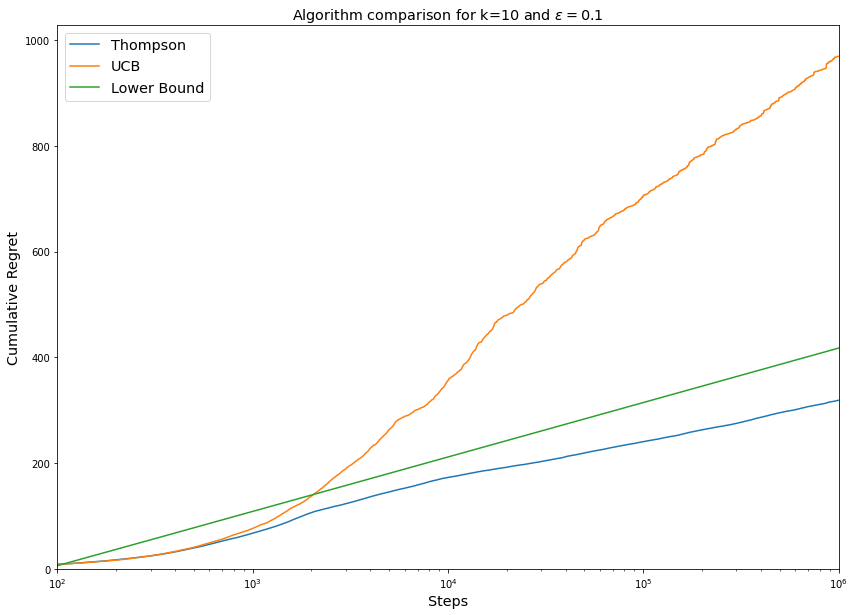

In [6]:
plot_results(ts,ucb,lb)